# The Force is Strong with This One: Star Wars Survey Data Analysis
---
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this project, we will be cleaning and doing an analysis of the gathered survey data. Some of its columns are:
- `RespondentID`: An anonymized ID for the respondent (person taking the survey)
- `Gender`: The respondent's gender
- `Age`: The respondent's age
- `Household Income`: The respondent's income
- `Education`: The respondent's education level
- `Location (Census Region)`: The respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?`: Has a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?`: Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, we'll need to remove the invalid rows.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


As we can see, we need to remove rows where `RespondentID` is `NaN`.

In [2]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


For the columns with the binary responses, we convert them to a boolean type containing only `True`, `False`, or `NaN` values.

In [3]:
bool_map = {"Yes": True, "No": False}

cols = ["Have you seen any of the 6 films in the Star Wars franchise?",
        "Do you consider yourself to be a fan of the Star Wars film franchise?"]

for col in cols:
    star_wars[col] = star_wars[col].map(bool_map)
    print(star_wars[col].value_counts())
    print("\n")

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64




The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [4]:
import numpy as np

bool_map = {"Star Wars: Episode I The Phantom Menace": True,
            "Star Wars: Episode II Attack of the Clones": True,
            "Star Wars: Episode III Revenge of the Sith": True,
            "Star Wars: Episode IV A New Hope": True,
            "Star Wars: Episode V The Empire Strikes Back": True,
            "Star Wars: Episode VI Return of the Jedi": True,
             np.NaN: False}

colname_map = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
               "Unnamed: 4": "seen_2",
               "Unnamed: 5": "seen_3",
               "Unnamed: 6": "seen_4",
               "Unnamed: 7": "seen_5",
               "Unnamed: 8": "seen_6"}

for i in range(3, 9):
    col = star_wars.columns[i]
    star_wars[col] = star_wars[col].apply(lambda x: ' '.join(x.split()) 
                                          if pd.notnull(x) 
                                          else x)
    star_wars[col] = star_wars[col].map(bool_map)
    print(star_wars.iloc[:,i].value_counts())
    print("\n")
    
star_wars = star_wars.rename(columns = colname_map)

star_wars.head()


True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


False    615
True     571
Name: Unnamed: 4, dtype: int64


False    636
True     550
Name: Unnamed: 5, dtype: int64


True     607
False    579
Name: Unnamed: 6, dtype: int64


True     758
False    428
Name: Unnamed: 7, dtype: int64


True     738
False    448
Name: Unnamed: 8, dtype: int64




,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite.

In [5]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

colname_map = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "rating_1",
               "Unnamed: 10": "rating_2",
               "Unnamed: 11": "rating_3",
               "Unnamed: 12": "rating_4",
               "Unnamed: 13": "rating_5",
               "Unnamed: 14": "rating_6"}

star_wars = star_wars.rename(columns = colname_map)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rating_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Rankings

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, we take the mean of each of the ranking columns and plot them.

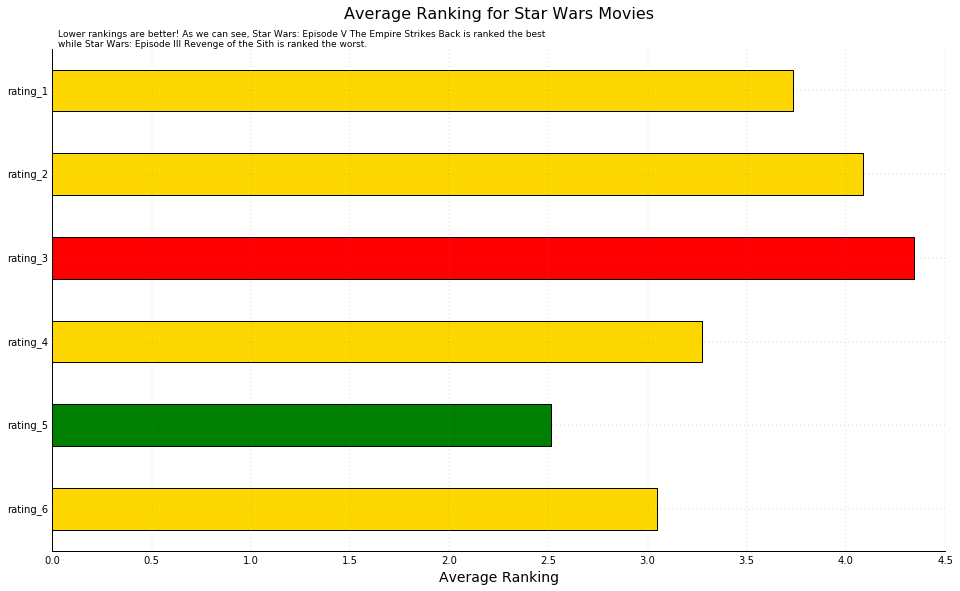

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

colmeans = star_wars[star_wars.columns[9:15]].mean()
colmeans = colmeans.sort_index(ascending = False)

fig = plt.figure()

fig.suptitle("Lower rankings are better! As we can see, Star Wars: Episode V The Empire Strikes Back is ranked the best\nwhile Star Wars: Episode III Revenge of the Sith is ranked the worst.", 
              y = 0.93, x = 0.13, fontsize = 9, ha = "left")

ax = colmeans.plot(kind = "barh", figsize = (16, 9), color = "gold")
ax.spines["right"].set_visible(False)    
ax.spines["top"].set_visible(False)
ax.set_xlabel("Average Ranking", size = 14)
ax.set_title("Average Ranking for Star Wars Movies", size = 16, y = 1.05)
ax.tick_params(bottom = "off", top = "off", left = "off", right = "off")
ax.grid(True, color = "gray", linewidth = 0.30)

ax.patches[1].set_facecolor("green")
ax.patches[3].set_facecolor("red")

## Viewership

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. When we call methods like `pandas.DataFrame.sum()` or `mean()`, they treat Booleans like integers. They consider `True` a `1`, and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

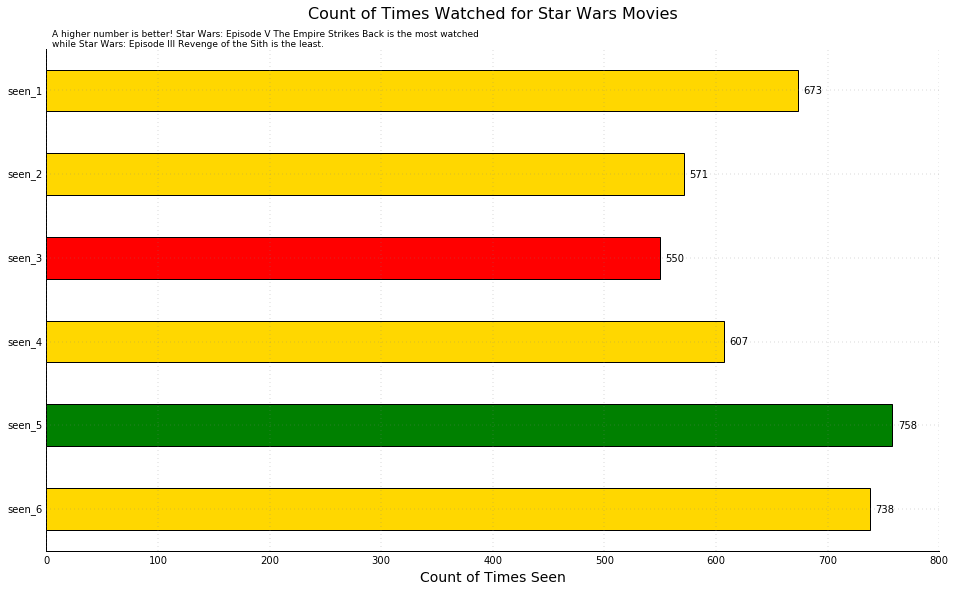

In [7]:
colsums = star_wars[star_wars.columns[3:9]].sum()
colsums = colsums.sort_index(ascending = False)

fig2 = plt.figure()

fig2.suptitle("A higher number is better! Star Wars: Episode V The Empire Strikes Back is the most watched\nwhile Star Wars: Episode III Revenge of the Sith is the least.", 
              y = 0.93, x = 0.13, fontsize = 9, ha = "left")

ax2 = colsums.plot(kind = "barh", figsize = (16, 9), color = "gold")
ax2.spines["right"].set_visible(False)    
ax2.spines["top"].set_visible(False)
ax2.set_xlabel("Count of Times Seen", size = 14)
ax2.set_title("Count of Times Watched for Star Wars Movies", size = 16, y = 1.05)
ax2.tick_params(bottom = "off", top = "off", left = "off", right = "off")
ax2.grid(True, color = "gray", linewidth = 0.30)

ax2.patches[1].set_facecolor("green")
ax2.patches[3].set_facecolor("red")

def add_value_labels(ax, spacing = 5): # modified for barh
    """
    Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axesof the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        if rect.get_x() < 0:
            x_value = rect.get_x()
        else:
            x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'center'

        # Use Y value as label and format number with one decimal place
        label = "{}".format(int(x_value))

        # Create annotation
        ax.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (space, 0),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for
                                          # positive and negative values.

add_value_labels(ax2, spacing = 15)

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

## Rankings by Fandom Membership

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded.

One segmentation we can do is whether or not the viewer considers himself/herself a fan of the Star Wars film franchise.

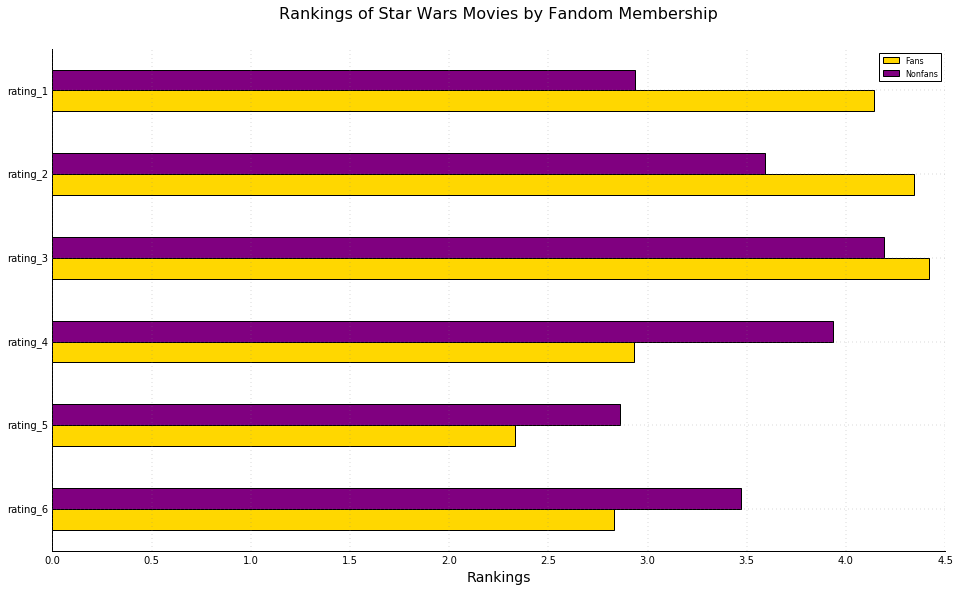

In [8]:
# Subsetting the data
fans    = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
nonfans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

fans_colmeans = fans[fans.columns[9:15]].mean()
fans_colmeans = fans_colmeans.sort_index(ascending = False)
# fans_colmeans = fans_colmeans.tolist()

nonfans_colmeans = nonfans[nonfans.columns[9:15]].mean()
nonfans_colmeans = nonfans_colmeans.sort_index(ascending = False)
# nonfans_colmeans = nonfans_colmeans.tolist()

# Create consolidated data in a dataframe
y1 = fans_colmeans.values.tolist()
y2 = nonfans_colmeans.values.tolist()
index = nonfans_colmeans.index.tolist()
df_fans = pd.DataFrame({'Fans': y1, 'Nonfans': y2}, index = index)

# fig3 = plt.figure(figsize = (16, 9))

# fig3.suptitle("For Fans: Episode V is best and Episode III is worst\nFor Nonfans: the same is true.", 
#               y = 0.93, x = 0.13, fontsize = 9, ha = "left")

ax3 = df_fans.plot(color = ("gold", "purple"), figsize = (16, 9), kind = "barh")

ax3.spines["right"].set_visible(False)    
ax3.spines["top"].set_visible(False)
ax3.set_xlabel("Rankings", size = 14)
ax3.set_title("Rankings of Star Wars Movies by Fandom Membership", size = 16, y = 1.05)
ax3.tick_params(bottom = "off", top = "off", left = "off", right = "off")
ax3.grid(True, color = "gray", linewidth = 0.30)
ax3.legend(loc = "upper right", fontsize = 8)
